<a href="https://colab.research.google.com/github/ewuerfel66/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/EricWuerfel_DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Imports

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

from statistics import mean, median
from scipy.stats import ttest_ind

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

### Load Data & Validate Observations

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header = None)

In [156]:
df.shape

(690, 16)

The dataframe has **the correct number of rows**

According to UCI, there are 690 instances in the dataset and we have 690 rows.

### Find & Replace Missing Values

In [0]:
df = df.replace(to_replace = '+', value = 1)
df = df.replace(to_replace = '-', value = 0)

In [0]:
df = df.rename(columns={15:'status'})

In [159]:
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
status    0
dtype: int64

In [160]:
df['status'].value_counts()

0    383
1    307
Name: status, dtype: int64

We only have 1s and 0s in 'status'.
There isn't any missing data in the column we're interested in

There's our missing value: '?'

In [0]:
df = df.replace(to_replace = '?', value = np.NaN)

### Check and Fix Data Types

col 1, 
col 10, 
col 13, 
col 14 --> float

In [162]:
df.dtypes

0          object
1          object
2         float64
3          object
4          object
5          object
6          object
7         float64
8          object
9          object
10          int64
11         object
12         object
13         object
14          int64
status      int64
dtype: object

In [0]:
df[1] = df[1].astype(float)

In [0]:
df[10] = df[10].astype(float)

In [0]:
df[13] = df[13].astype(float)

In [0]:
df[14] = df[14].astype(float)

In [167]:
df.dtypes

0          object
1         float64
2         float64
3          object
4          object
5          object
6          object
7         float64
8          object
9          object
10        float64
11         object
12         object
13        float64
14        float64
status      int64
dtype: object

In [168]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,status
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,1


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

### Split

In [0]:
approved = df[df['status'] == 1.]
denied = df[df['status'] == 0.]

### Continuous Variables

1, 2, 7, 10, 13, 14

Blue is Approved, Orange is Denied

#### Visualize the Distributions (Histograms)

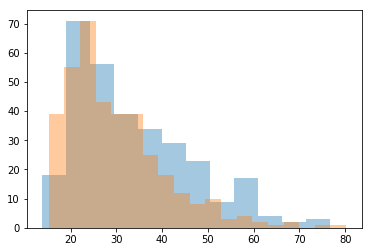

In [170]:
app_1 = approved[1].dropna().tolist()
den_1 = denied[1].dropna().tolist()

ax = sns.distplot(app_1, kde=False);
ax = sns.distplot(den_1, kde=False);

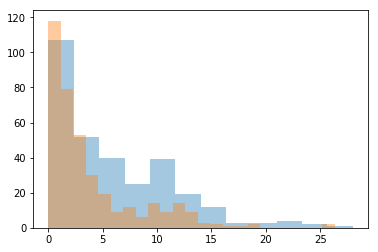

In [171]:
app_2 = approved[2].dropna().tolist();
den_2 = denied[2].dropna().tolist();

ax = sns.distplot(app_2, kde=False);
ax = sns.distplot(den_2, kde=False);

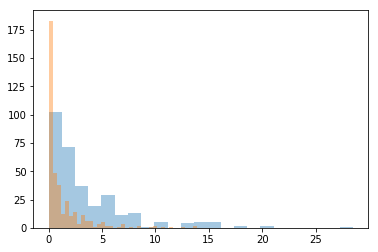

In [172]:
app_7 = approved[7].dropna().tolist();
den_7 = denied[7].dropna().tolist();

ax = sns.distplot(app_7, kde=False);
ax = sns.distplot(den_7, kde=False);

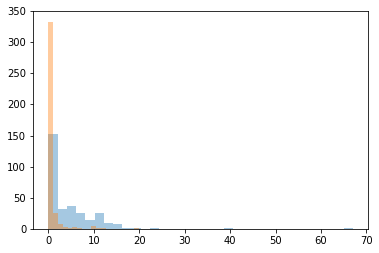

In [173]:
app_10 = approved[10].dropna().tolist();
den_10 = denied[10].dropna().tolist();

ax = sns.distplot(app_10, kde=False);
ax = sns.distplot(den_10, kde=False);

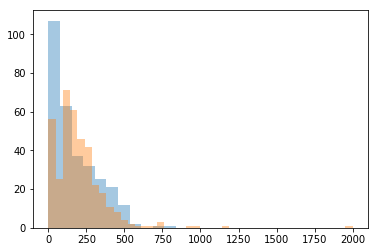

In [174]:
app_13 = approved[13].dropna().tolist();
den_13 = denied[13].dropna().tolist();

ax = sns.distplot(app_13, kde=False);
ax = sns.distplot(den_13, kde=False);

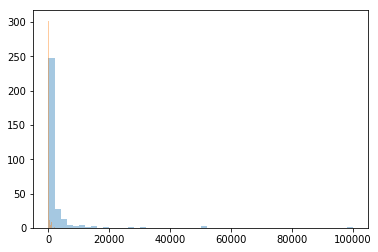

In [175]:
app_14 = approved[14].dropna().tolist();
den_14 = denied[14].dropna().tolist();

ax = sns.distplot(app_14, kde=False);
ax = sns.distplot(den_14, kde=False);

#### t-tests

Variables **10 and 14** seem to show the biggest differences between the two groups

In [176]:
ttest_ind(approved[10], denied[10], nan_policy='omit')

Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)

The positive t-statistic, and p-value << 0.01 indicate that we can reject the null hypothesis that the mean of column 10 for borrowers who were approved is the same as the mean of column 10 for borrowers who were denied.

In [177]:
ttest_ind(approved[14], denied[14], nan_policy='omit')

Ttest_indResult(statistic=4.680216020964486, pvalue=3.4520256956287944e-06)

The positive t-statistic, and p-value << 0.01 indicate that we can reject the null hypothesis that the mean of column 14 for borrowers who were approved is the same as the mean of column 14 for borrowers who were denied.

### Categorical Variables

#### Visualize (Crosstabs)

In [178]:
pd.crosstab(df['status'], df[3], margins=True)

3,l,u,y,All
status,,,,
0,0,263,118,381
1,2,256,45,303
All,2,519,163,684


In [179]:
pd.crosstab(df['status'], df[4], margins=True)

4,g,gg,p,All
status,,,,
0,263,0,118,381
1,256,2,45,303
All,519,2,163,684


In [180]:
pd.crosstab(df['status'], df[5], margins=True)

5,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x,All
status,,,,,,,,,,,,,,,
0,35,75,12,23,11,46,45,7,37,22,27,1,31,6,378
1,19,62,29,7,14,7,14,3,14,16,51,2,33,32,303
All,54,137,41,30,25,53,59,10,51,38,78,3,64,38,681


In [181]:
pd.crosstab(df['status'], df[6], margins=True)

6,bb,dd,ff,h,j,n,o,v,z,All
status,,,,,,,,,,
0,34,4,49,51,5,2,1,230,2,378
1,25,2,8,87,3,2,1,169,6,303
All,59,6,57,138,8,4,2,399,8,681


In [0]:
contingency_8 = pd.crosstab(df['status'], df[8], margins=True)

In [0]:
contingency_9 = pd.crosstab(df['status'], df[9], margins=True)

In [184]:
pd.crosstab(df['status'], df[11], margins=True)

11,f,t,All
status,,,
0,213,170,383
1,161,146,307
All,374,316,690


In [185]:
pd.crosstab(df['status'], df[12], margins=True)

12,g,p,s,All
status,,,,
0,338,3,42,383
1,287,5,15,307
All,625,8,57,690


#### chi2 tests

In [186]:
scipy.stats.chi2_contingency(contingency_8)

(358.1003264716328,
 3.125328283651331e-76,
 4,
 array([[182.61884058, 200.38115942, 383.        ],
        [146.38115942, 160.61884058, 307.        ],
        [329.        , 361.        , 690.        ]]))

With a p-value << 0.01 we can reject the null hypothesis that variable 8 and a borrower's approval status are independent.

In [187]:
scipy.stats.chi2_contingency(contingency_9)

(144.9276762819937,
 2.485584730494459e-30,
 4,
 array([[219.25362319, 163.74637681, 383.        ],
        [175.74637681, 131.25362319, 307.        ],
        [395.        , 295.        , 690.        ]]))

Th ep-value for this chi2 test isn't nearly as extreme as it was for variable 8, but it's still << 0.01. This allows us to reject the null hypothesis that variable 9 and a borrower's approval status are independent.

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

### t-test: Variable 10

test-statistic: 11.7

p-value: $7.96 * 10^{-29}$

The borrowing data was first split in two according to the approval status of the borrower. From observing the two resulting distributions of Variable 10 led me to believe that the mean of Variable 10 for those who were approved would be higher than that for those who were denied.

The t-test returned a positive test-statistic, meaning that the calculated mean of Variable 10 for those approved is higher than the calculated mean for those who were denied. But is it **significantly** higher?

The p-value of $7.96 * 10^{-29}$ tells us that there is an extraordinarily small chance that the difference we observed in the means is due to chance.

We can say that the mean of Variable 10 is higher for those approved than it is for those denied, with 99% confidence.

### t-test: Variable 14

test-statistic: 4.68

p-value: $3.45 * 10^{-6}$

From the distributions, it seems that the mean for Variable 14 is higher for those who were accepted than it is for those who were denied.

The t-test again returned a positive statistic, confirming that the direction of my observation is at least correct.

The p-value of  $3.45 * 10^{-6}$ tells us that there is a wildly small probability that the difference in means is due to chance.

We can say that the mean of Variable 14 is higher for those approved than for those denied.

### chi2-test: Variable 8

chi2: 358

p-value: $3.13 * 10^{-76}$

From the crosstabs, it looked like many more of those who were approved belonged to 't' than belonged to 'f'.

To confirm this suspicion, I ran a chi2 test. The extraordinarily low p-value allows us to reject the null hypothesis that approval status and Variable 8 are independent.

In [188]:
contingency_8

8,f,t,All
status,,,
0,306,77,383
1,23,284,307
All,329,361,690


### chi2-test: Variable 9

chi2: 145

p-value: $2.49 * 10^{-30}$

The crosstab shows that a higher proportion of those approved are in 't' than in 'f'. Vice versa for those who were denied.

The chi2 test returns a p-value of $2.49 * 10^{-30}$ which is again, far less than 0.01. This allows us to reject the null hypothesis that approval status and Variable 9 are independent.

In [189]:
contingency_9

9,f,t,All
status,,,
0,297,86,383
1,98,209,307
All,395,295,690


The most difficult part of this sprint challenge was finding the best way to search for differences in the continuous variables. Luckily, there are a few variables whose differences between approval status is pretty obvious. Once I had the data cleaned up and split into groups based on approval status, performing the tests was pretty simple.

Explaining the results of t-tests and chi2-tests in meaningful ways is a challenge as well.